In [1]:
#title: 'Boosting'
#author: 'Tomasz Konieczny'

In [2]:
#import essential packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import copy
import random

sns.set_style('darkgrid')

In [3]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

### Wprowadzenie

#### Czy *boosting* działa?

In [4]:
cal_housing = fetch_california_housing()

In [5]:
print(cal_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [6]:
X = pd.DataFrame(cal_housing.data, columns = cal_housing.feature_names)
y = cal_housing.target

In [7]:
print('Training dataset with {} observations and {} columns.'.format(cal_housing.data.shape[0], cal_housing.data.shape[1]))

Training dataset with 20640 observations and 8 columns.


In [8]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [11]:
#define mean absolute error
def mae(y_hat, y):
    return np.abs(y_hat - y).mean()

Dopasujemy trzy różne regresory: 
- proste drzewo decyzyjne (`decision tree`),
- przycięte drzewo decyzyjne (`pruned decision tree`),
- GBR (`gradient boosting`) z wykorzystaniem drzew decyzyjnych.

In [12]:
clf_0 = DecisionTreeRegressor()
clf_0.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [13]:
clf_1 = DecisionTreeRegressor(max_depth=10)
clf_1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [14]:
clf_2 = GradientBoostingRegressor()
clf_2.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

<table>
  <tr>
    <td></td>
    <td colspan="2">Train data</td>
    <td colspan="2">Test data</td>      
  </tr>
  <tr>
    <td>Regressor</td>      
    <td>$R^2$</td>
    <td>MAE</td>      
    <td>$R^2$</td>
    <td>MAE</td>            
  </tr>
  <tr>
    <td>Decision Tree (<b>clf_0</b>)</td>      
    <td> {{'%.4f' % clf_0.score(X_train, y_train)}} </td>
    <td> {{'%.4f' % mae(clf_0.predict(X_train), y_train)}} </td>      
    <td style="color:red;"> {{'%.4f' % clf_0.score(X_test, y_test)}}</td>
    <td style="color:red;"> {{'%.4f' % mae(clf_0.predict(X_test), y_test)}}</td>            
  </tr>
  <tr>
    <td>Decision Tree D=10 (<b>clf_1</b>)</td>      
    <td> {{'%.4f' % clf_1.score(X_train, y_train)}} </td>
    <td> {{'%.4f' % mae(clf_1.predict(X_train), y_train)}} </td>      
    <td> {{'%.4f' % clf_1.score(X_test, y_test)}}</td>
    <td> {{'%.4f' % mae(clf_1.predict(X_test), y_test)}}</td>             
  </tr>
  <tr>
    <td>GBR (<b>clf_2</b>)</td>      
    <td> {{'%.4f' % clf_2.score(X_train, y_train)}} </td>
    <td> {{'%.4f' % mae(clf_2.predict(X_train), y_train)}} </td>      
    <td style="color:green;"> <b>{{'%.4f' % clf_2.score(X_test, y_test)}}</b></td>
    <td style="color:green;"> <b>{{'%.4f' % mae(clf_2.predict(X_test), y_test)}}</b></td>                
  </tr>    
</table>

#### Jak *boosting* działa?

> **Boosting** 

należy do metod **sekwencyjnych** uczenia maszynowego. Oznacza to, że wykorzystując słabe algorytmy  (*weak learners*) w procesie uczenia tworzy jeden silny algorytm (*strong learner*).

W procesie uczenia rozważamy zarówno algorytmy w problemach klasyfikacyjnych (*classifiers*), jak również w problemach regresji (*regressors*).

<img src='files/boosting.png'>

Źródło: [Hands-On Machine Learning](#HML)

Najczęściej stosowane algorytmy:
- adaptive boosting (AdaBoost)
- gradient boosting

### Adaptive boosting

#### Opis

Sposób działania Adaptive Boosting:
- Krok (1): Dopasowujemy słaby klasyfikator wykorzystując zbiór danych uczących $X$ oraz zmienną objaśnianą $y$, gdzie wszystkie obserwacje są tak samo istotne (tj. mają te same wagi w procesie uczenia)
- Krok (2): Obserwacje źle sklasyfikowane w kolejnej iteracji otrzymują wiekszą wagę. Znowu dopasowujemy klasyfikator na danych $X$ oraz zmiennej $y$
- W krokach (3) oraz (4) powtarzamy w/w operację dla każdego ze słabych algorytmów.

<table style="margin-left:auto;margin-right:auto;">
    <tr>
        <td><img src='files/ada_boost_1_PML.png' width="80%" height="80%"></td>
        <td><img src='files/ada_boost_2_ESL.png'></td>
    </tr>
    <tr>
        <td colspan=2><img src='files/ada_boost_3.png' width="50%" height="50%"></td>
    </tr>
</table>

Źródła:

[Python Machine Learning](#PML)

[Elements of Statistical Learning](#ESL)

[CMU CS: Introduction to Machine Learning](http://www.cs.cmu.edu/~10701/slides/12_Boosting.pdf)

#### Implementacja

In [15]:
class MyAdaBoost():
    def __init__(self):
        self.alphas_ = []
        self.clfs_ = []
        self.weights_ = []
        
    def fit(self, X, y, m=1):
        
        w = np.ones(len(y)) / len(y)
        
        for _ in range(m):
            c = DecisionTreeClassifier(max_depth=1)
            c.fit(X, y, sample_weight=w)           
            self.clfs_.append(c)
            #calculate error
            error = (w * (c.predict(X) != y)).sum()
            #compute alpha
            alpha = np.log((1 - error) / error)
            self.alphas_.append(alpha)
            #update weights
            w[c.predict(X) != y] = np.exp(alpha) * w[c.predict(X) != y]
            w /= w.sum()
            self.weights_.append(w)            
        return self
        
    def predict(self, X):
        preds_ = []
        for i, c in enumerate(self.clfs_):
            preds = c.predict(X)
            preds_.append(preds)
        return np.sign(np.array(preds_).T @ self.alphas_)

In [16]:
#helper function to plot decision surface for two variables
def decision_surface(X, y, clf):

    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min)/100),
               np.arange(y_min, y_max, (y_max - y_min)/100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap = plt.cm.Set3)
    sns.scatterplot(X[:,0], X[:,1], hue=y, legend=False)
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.title('Decision surface')
    plt.show()

#### Dane oraz estymacja

Załóżmy, że mamy następujący zbiór danych:
- dwie zmienne objasniające $X_1$ oraz $X_2$,
- zmienna objaśniana $y$ może przyjmować wartości $\{-1, 1\}$,
- dane są liniowo podzielne.

Przykład jest uproszczony celowo, tak aby łatwiej można było wyjaśnić sposób działania samego algorytmu. 

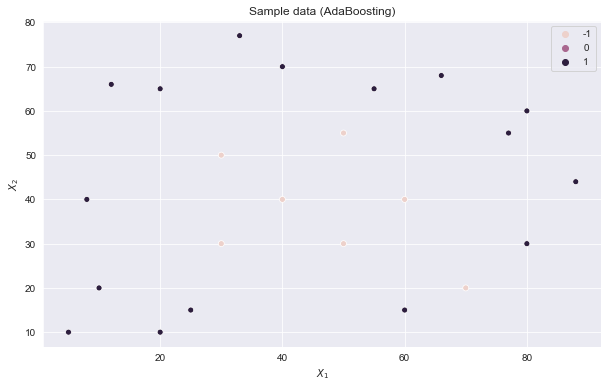

In [17]:
X1 = np.array([10., 20., 40., 80., 80.,  5.,  8., 12., 33., 55., 66., 77., 88., 20., 30., 40., 50., 60., 25., 30., 50., 70., 60.])
X2 = np.array([20., 65., 70., 60., 30., 10., 40., 66., 77., 65., 68., 55., 44., 10., 30., 40., 30., 15., 15., 50., 55., 20., 40.])
X = np.vstack((X1,X2)).T
y = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,1,1,-1,-1,-1,-1])
plt.figure(figsize=(10,6))
sns.scatterplot(X1, X2, hue=y)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.title("Sample data (AdaBoosting)")
plt.show()

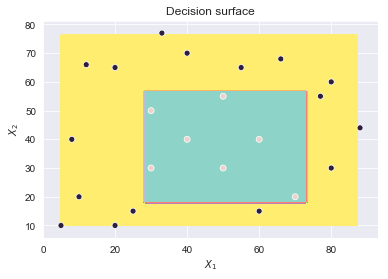

In [18]:
n_estimators = 11
ada_own = MyAdaBoost()
ada_own.fit(X, y, m=n_estimators);
decision_surface(X, y, ada_own)

Estymacja za pomocą pakietu sci-kit learn oraz [`AdaBoostClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html).

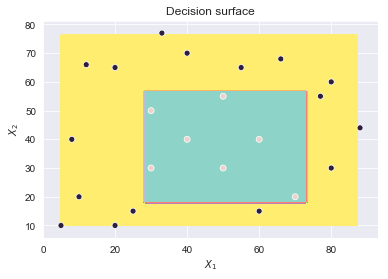

In [19]:
ada_sklearn = AdaBoostClassifier(n_estimators=n_estimators, algorithm='SAMME') #base_estimator=DecisionTreeClassifier(max_depth=1)
ada_sklearn.fit(X, y)
decision_surface(X,y, ada_sklearn)

Implementacje sci-kit learn zawierają algorytmy umożliwiające estamację:
- klasyfkacji z wieloma klasami (multiclass classification) [`AdaBoostClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
- problemów regresji [`AdaBoostRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

### Gradient boosting

#### Opis

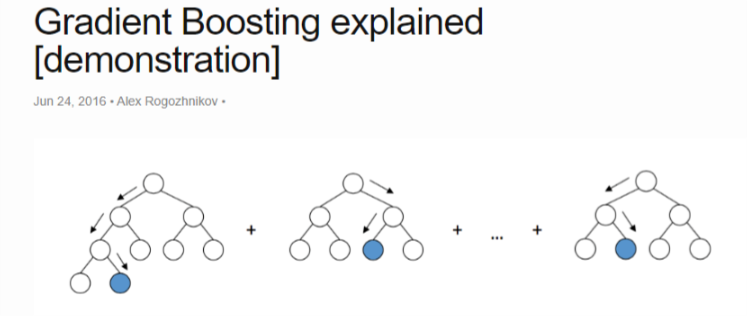
Źródło: [Brilliantly wrong: thoughts on science and programming](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)

Sposób działania Gradient Boosting:

- Krok (0): Rozważamy $i = 1 ... m$ słabych estymatorów $G_i(X)$
- Krok (1): Dopasowujemy słaby estymator $G_1(X)$ wykorzystując zbiór danych $\{X, y\}$
- Krok (2): Estymujemy $\hat y_1$ wykorzystując $G_1(X)$ oraz obliczamy reszty z modelu $res_1 = y - \hat y_1$
- Krok (3): Dopasowujemy słaby estymator $G_2(X)$ na danych $\{X, y_2\}$ z tym, że reszty z poprzedniego kroku stają się naszą nową zmienną objaśnianą $y_2 = res_1$
- Kolejne kroki: powtarzamy krok (3) dla pozostałych estymatorów.

#### Implementacja

In [20]:
#helper function to calculate root mean square error
def mse(y_act, y_pred):
    assert(len(y_act) == len(y_pred))
    error = ((y_act - y_pred) ** 2).mean()
    return round(error, 4)

In [21]:
def predict_and_plot(X, y, classifier, iterations=4):
    
    y_curr = copy.copy(y)
        
    classifiers = []
       
    for iteration in range(iterations):
        
        clf = clone(classifier)
        clf.fit(X, y_curr)
        y_hat = clf.predict(X)
        classifiers.append(clf)
        
        #do some plotting
        plt.figure(figsize=(15,5))        
        plt.subplot(121) #plot residuals (LHS)
        sns.scatterplot(X.reshape(-1), y_curr, color = 'blue', alpha=.5)
        x_line = np.linspace(min(X), max(X), 500) #only for graph
        y_line = clf.predict(x_line.reshape(-1,1)) #only for graph
        sns.lineplot(x_line, y_line, color = 'red')
        if iteration > 0: plt.axhline(0, ls='--', color = 'black')
        plt.title('Residuals')
        plt.ylabel('Iteration {}'.format(iteration+1))
        
        plt.subplot(122) #plot fitted classifier (RHS)
        y_pred_plot = sum(classifier.predict(x_line.reshape(-1, 1)) for classifier in classifiers) #only for plotting
        y_pred = sum(classifier.predict(X.reshape(-1, 1)) for classifier in classifiers) #same size as training data to calc RMSE
        error = mse(y, y_pred)
        
        sns.scatterplot(X.reshape(-1), y, color = 'darkblue', alpha=.5)
        sns.lineplot(x_line, y_pred_plot, color = 'green')
        plt.title('Predictions, MSE = {}'.format(error))
        
        plt.show()
        
        y_curr -= y_hat

#### Dane i estymacja

Dla zobrazowania sposobu działania algorytmu wygenerujemy następujące dane:
- tylko jedna zmienna objaśniająca $x$
- zależność względem zmiennej objaśnianej będzie nieliniowa $y = \sin(x) + \epsilon$

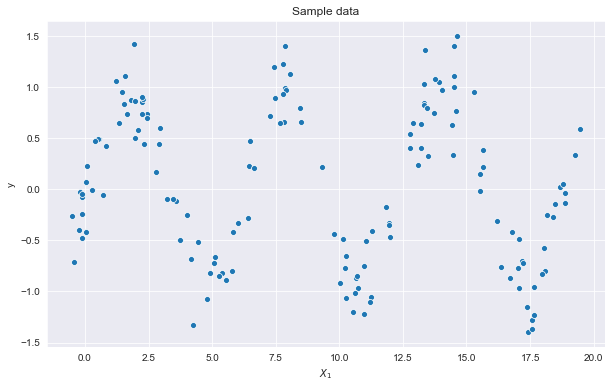

In [22]:
np.random.seed(1)
sample_size = 150
X = np.random.rand(sample_size, 1)*20 - 0.5
y = np.sin(X[:, 0]) + 0.25*np.random.randn(sample_size)
plt.figure(figsize=(10,6))
sns.scatterplot(X.reshape(-1), y)
plt.xlabel('$X_1$')
plt.ylabel('y')
plt.title('Sample data')
plt.show()

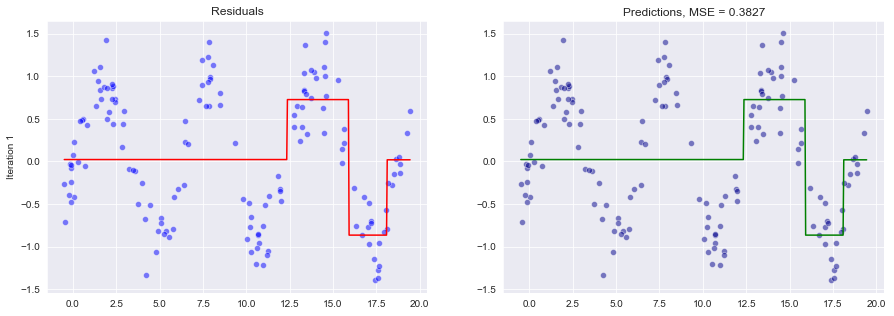

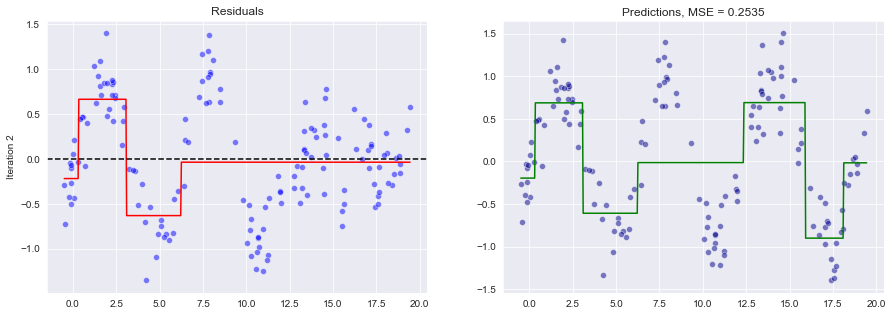

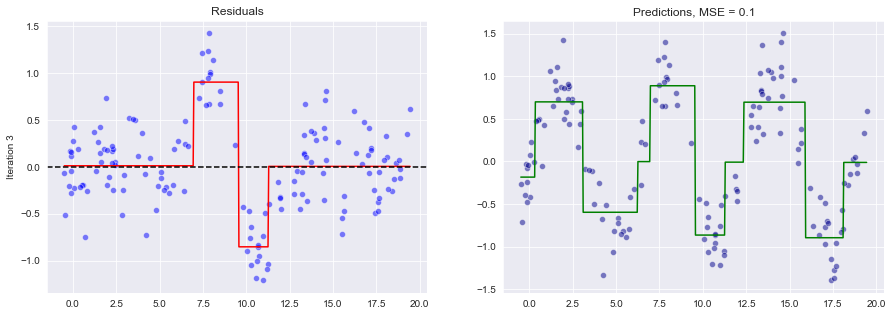

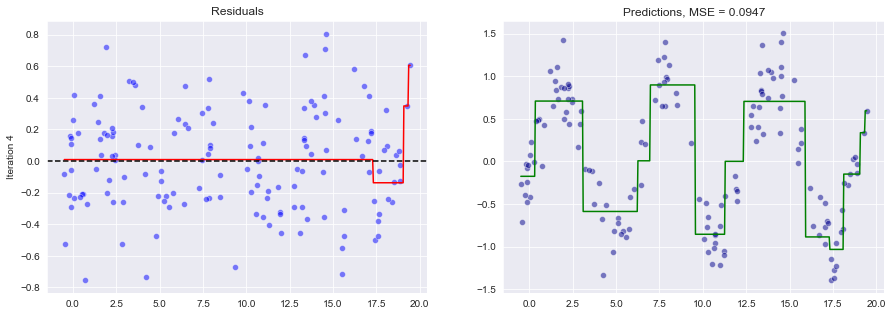

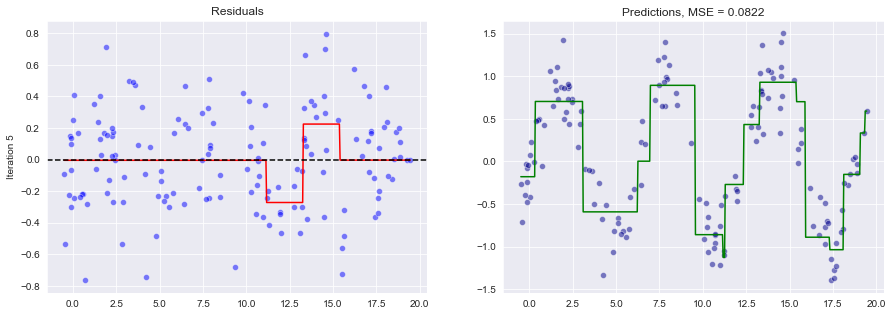

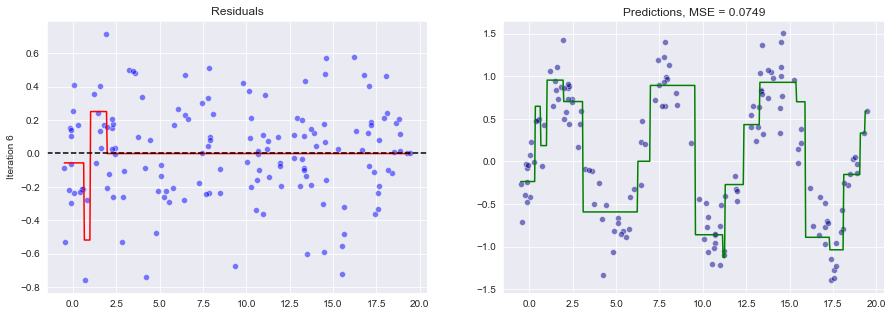

In [23]:
clf = DecisionTreeRegressor(max_depth=2, random_state=42) #very shallow tree (naive classifier)
predict_and_plot(X, y, clf, iterations=6)

Estymacja za pomocą pakietu sci-kit learn oraz [`GradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor).

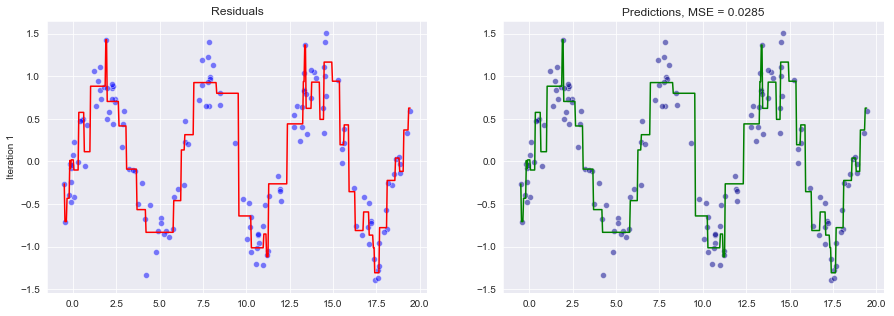

In [24]:
gbr_scikit = GradientBoostingRegressor(n_estimators=20, learning_rate=1, max_depth=2)
predict_and_plot(X, y, gbr_scikit, iterations=1)

### Optymalizacja hiperparametrów (Hyperparameter Tuning)

Podstawowe zmienne modelu, ktore mozemy optymalizowac:
- `n_estimators` - liczba poszczególnych drzew, iteracji
- `max_depth` - głębokość poszczególnych drzew (im wyższa tym większe interakcje pomiędzy zmiennymi) - zwiększa wariancję modelu 
- `min_sample_leaf` - minimalna liczba obserwacji, potrzebna do podziału drzewa - zwiększa obciażenie modelu
- `learning_rate` - (*shrinkage*) prędkość uczenia

In [25]:
scores_test = []
scores_train = []
for count_est in range(0, 500, 50):
    clf_3 = GradientBoostingRegressor(n_estimators=count_est+1)
    clf_3.fit(X_train, y_train)
    scores_test.append(mae(clf_3.predict(X_test), y_test))
    scores_train.append(mae(clf_3.predict(X_train), y_train))

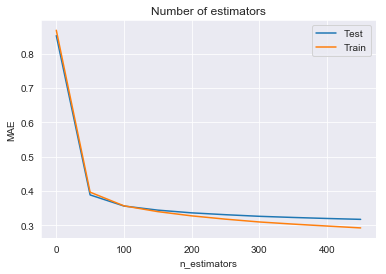

In [26]:
sns.lineplot(range(0, 500, 50), scores_test)
sns.lineplot(range(0, 500, 50), scores_train)
plt.ylabel('MAE')
plt.xlabel('n_estimators')
plt.legend(['Test', 'Train'])
plt.title('Number of estimators')
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[1,2,3], 'subsample':[0.1, 0.25, 0.5, 1], 'learning_rate':[0.1, 0.2, 0.5, 1]}

optimisation = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators=200), param_grid=param_grid, verbose=1)

optimisation.fit(X_train, y_train)

C:\Users\TOMAS529\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  1.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3], 'subsample': [0.1, 0.25, 0.5, 1], 'learning_rate': [0.1, 0.2, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [28]:
optimisation.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'subsample': 1}

In [29]:
clf_4 = GradientBoostingRegressor(learning_rate = .2, max_depth=3, subsample=1)
clf_4.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

<table>
  <tr>
    <td></td>
    <td colspan="2">Train data</td>
    <td colspan="2">Test data</td>      
  </tr>
  <tr>
    <td>Regressor</td>      
    <td>$R^2$</td>
    <td>MAE</td>      
    <td>$R^2$</td>
    <td>MAE</td>            
  </tr>
  <tr>
    <td>GBR (<b>clf_2</b>)</td>      
    <td> {{'%.4f' % clf_2.score(X_train, y_train)}} </td>
    <td> {{'%.4f' % mae(clf_2.predict(X_train), y_train)}} </td>      
    <td style="color:green;"> <b>{{'%.4f' % clf_2.score(X_test, y_test)}}</b></td>
    <td style="color:green;"> <b>{{'%.4f' % mae(clf_2.predict(X_test), y_test)}}</b></td>                
  </tr>
  <tr>
    <td>GBR optimised (<b>clf_4</b>)</td>      
    <td> {{'%.4f' % clf_4.score(X_train, y_train)}} </td>
    <td> {{'%.4f' % mae(clf_4.predict(X_train), y_train)}} </td>      
    <td style="color:blue;"> <b>{{'%.4f' % clf_4.score(X_test, y_test)}}</b></td>
    <td style="color:blue;"> <b>{{'%.4f' % mae(clf_4.predict(X_test), y_test)}}</b></td>                
  </tr> 
</table>

### Podsumowanie

Wady oraz zalety stosowania **boosting'u**:

 <font color='red'> Wady </font>      |  <font color='green'> Zalety </font> 
-----------|-----------
Brak mozliwosci uczenia równoległego      | Łatwe w interpretacji (często stosowane wraz z drzewami decyzyjnymi)      
Ciężko skalowalne  | Często bardzo duża moc predykcyjna (Kaggle)
Czasami, zbyt duża uwaga na obserwacje odstające (*outliers*)  | Brak konieczności przygotowywania danych (standaryzacja, numeryzacja, etc.)

### Implementacje Open-Soure

[LightGBM](https://lightgbm.readthedocs.io/en/latest/)

[xgboost](https://xgboost.readthedocs.io/en/latest/)

[scikit learn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
- `AdaBoosting`
- `GradientBoosting`
- `HistGradientBoosting`

Źródła:

-  <span id="HML"> [1a] [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) </span>

- [1b] [Hands-On ML - Git-Hub repo](https://github.com/ageron/handson-ml2)

- <span id="PML"> [2a] [Python Machine Learning](https://www.packtpub.com/data/python-machine-learning-third-edition) </span>

- [2b] [Python ML - Git-Hub repo]()

- <span id="ESL"> [3] [Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/) </span>

- [3] [Case Study 4: On Boosting: Theory and Applications](https://www.actuarialdatascience.org/ADS-Tutorials/)
